In [1]:
%matplotlib inline
import cv2
import os
import numpy as np
import glob
import keras
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

Using TensorFlow backend.


## Load in images

In [2]:
left_images = []
for img in glob.glob("img/blocked/left/*.png"):
    n= cv2.imread(img, flags=cv2.IMREAD_ANYDEPTH)
    left_images.append(n)

In [3]:
left_images[0].shape

(480, 752)

In [4]:
len(left_images)

84

In [5]:
right_images = []
for img in glob.glob("img/blocked/right/*.png"):
    n= cv2.imread(img, flags=cv2.IMREAD_ANYDEPTH)
    right_images.append(n)

In [6]:
right_images[0].shape

(480, 752)

In [7]:
len(left_images) / (len(left_images) + len(right_images))

0.3088235294117647

In [8]:
np.max(left_images)

37924

## Create X and y arrays (input and output) and shuffle them

In [9]:
y_left = np.full(len(left_images), 0)
y_right = np.full(len(right_images), 1)
y_all = np.concatenate((y_left, y_right))

In [10]:
X_all = np.concatenate((left_images, right_images), axis=0)
X_all[X_all == 10000] = 40000
X_all = (40000 - X_all)
X_all = X_all / 40000

In [11]:
X_all.shape

(272, 480, 752)

In [12]:
shuf_ind = np.random.permutation(len(y_all))
X_all = X_all[shuf_ind].reshape((len(y_all),X_all.shape[1],X_all.shape[2],1))
y_all = y_all[shuf_ind]
X_all.shape

(272, 480, 752, 1)

In [13]:
np.median(X_all)

0.0

In [14]:
np.min(X_all)

0.0

In [15]:
np.max(X_all[0])

0.9686

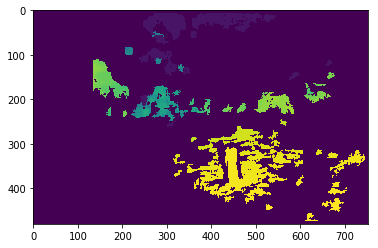

In [16]:
plt.imshow((X_all[0]).reshape((480,752)))

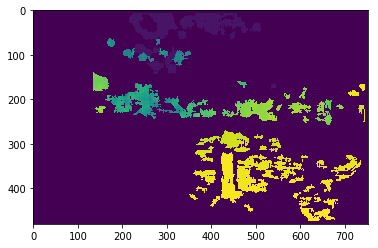

In [17]:
plt.imshow((X_all[1]).reshape((480,752)))

## Set up model and train

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(X_all.shape[1],X_all.shape[2], 1)),
    keras.layers.MaxPool2D((20, 20)),
    #
    keras.layers.Flatten(),  
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 478, 750, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 37, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13616)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 108936    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 109,105
Trainable params: 109,105
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
model.fit(X_all, y_all, validation_split=0.2, epochs=2, batch_size=8)


Train on 217 samples, validate on 55 samples
Epoch 1/2
217/217 [==============================] - 44s 205ms/step - loss: 0.5154 - accuracy: 0.6912 - val_loss: 0.2962 - val_accuracy: 0.8909
Epoch 2/2
217/217 [==============================] - 44s 205ms/step - loss: 0.3451 - accuracy: 0.8664 - val_loss: 0.2957 - val_accuracy: 0.8909


## Save model and weights

In [21]:
model.save("orient_model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
model.predict(X_all[1].reshape((1,480,752,1)))

array([[0.61272323]], dtype=float32)

In [23]:
X_all[0]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])